#  Title
### Data source: 
Requested data from <a href=https://www.the-numbers.com/>The Numbers</a> (of OpusData) and <a href=''>Inflation Calcuation</a>

## Module Imports and custom functions


In [1]:
import seaborn as sns
%matplotlib inline
from data_preprocess import *
sns.set_style('darkgrid')

 ### Load, Clean, and Adjust for Inflation
 

In [2]:
movie_data = load_clean_data()
movie_data = movie_data.sort_values(by=['profit'], ascending=False)
display(movie_data.head())
display(movie_data.describe())

,title,year,budget,rating,creative,source,genre,time,profit,sequel
695,Avatar,2009,425000000,PG-13,Science Fiction,Original Screenplay,Action,162.0,2821.614335,0.0
1641,Star Wars Ep. VII: The Force Awakens,2015,306000000,PG-13,Science Fiction,Original Screenplay,Adventure,136.0,1897.579985,1.0
1895,Avengers: Infinity War,2017,300000000,PG-13,Super Hero,Based on Comic/Graphic Novel,Action,156.0,1836.237566,1.0
1475,Jurassic World,2014,215000000,PG-13,Science Fiction,Based on Fiction Book/Short Story,Action,124.0,1558.600237,1.0
1108,The Avengers,2011,225000000,PG-13,Super Hero,Based on Comic/Graphic Novel,Action,143.0,1479.118666,0.0


,year,budget,time,profit,sequel
count,1936.000000,1.936000e+03,1822.000000,1936.000000,1934.000000
mean,2011.261880,5.342857e+07,109.396817,120.098410,0.152534
std,3.457548,5.368562e+07,19.644955,223.861766,0.359630
min,2006.000000,1.000000e+07,0.000000,-130.331286,0.000000
25%,2008.000000,1.900000e+07,97.000000,-0.630957,0.000000
50%,2011.000000,3.275000e+07,108.000000,41.586805,0.000000
75%,2014.000000,6.500000e+07,120.000000,139.888907,0.000000
max,2018.000000,4.250000e+08,201.000000,2821.614335,1.000000


Top 5 ways to make the most profits at box office

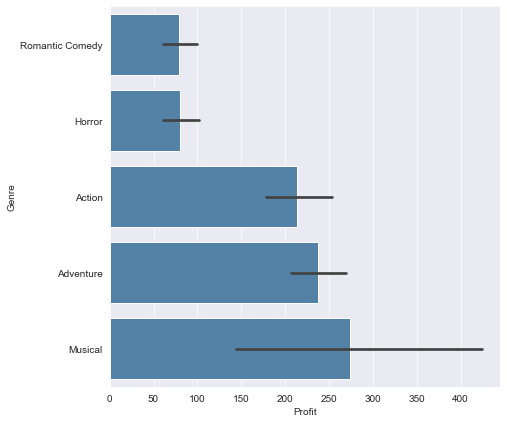

In [3]:
data_bar_graph(movie_data,'genre')

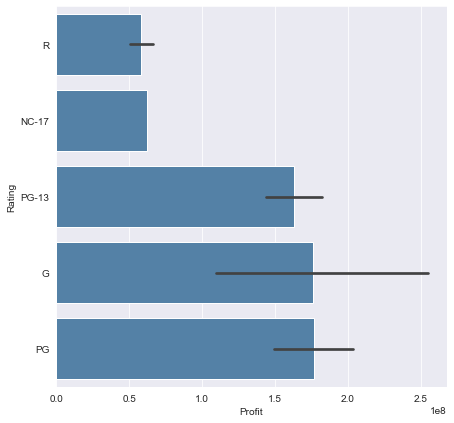

In [5]:
data_bar_graph(movie_data,'rating')

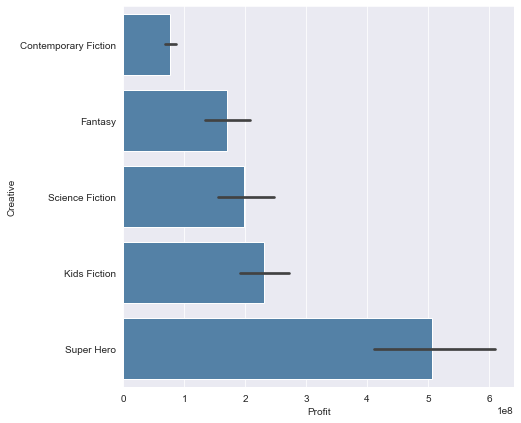

In [6]:
data_bar_graph(movie_data,'creative')

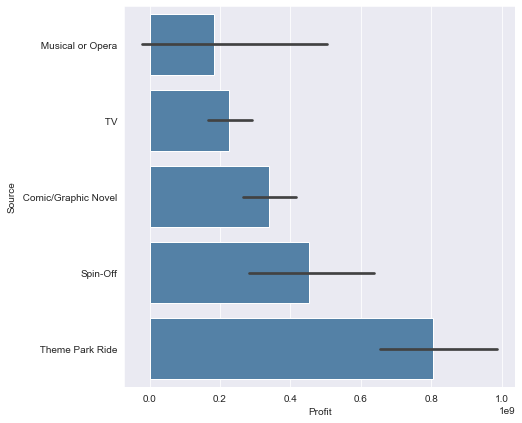

In [7]:
movie_data.source = movie_data.source.apply(lambda x: x.replace('Based on','') if isinstance(x,str) else x)
data_bar_graph(movie_data,'source')

Do we really want to sit in the movie that long?

[Text(0, 0.5, 'Ratio of movies'), (50, 200), Text(0.5, 0, 'Time (minutes)')]

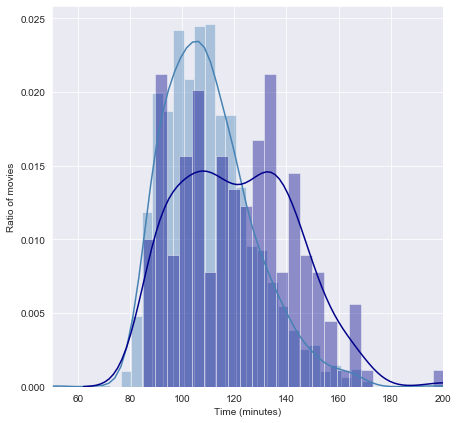

In [3]:
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.distplot(movie_data.time.dropna(), bins=50, color='steelblue')
sns.distplot(movie_data.iloc[0:int(movie_data.shape[0]*0.1)]['time'], bins=25, color='darkblue', ax=ax)
ax.set(xlim=(50,200),xlabel='Time (minutes)', ylabel='Ratio of movies')

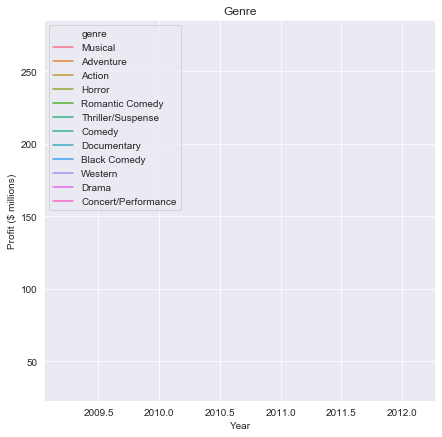

In [4]:
cols = ['genre', 'rating', 'creative', 'source']
col = cols[0]
avg_ = movie_data.groupby(col).agg('mean').reset_index().sort_values('profit', ascending=False)
data_line_graph(avg_, col)

[Text(0, 0.5, 'Profit ($ millions)'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Genre')]

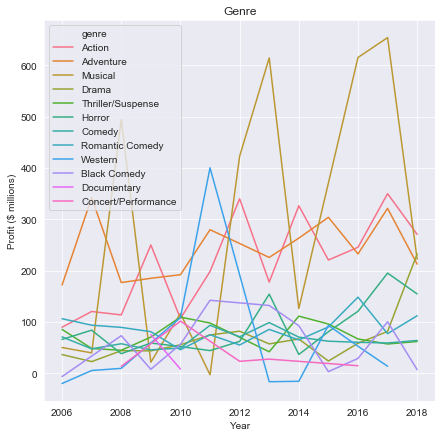

In [8]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.lineplot(x='year', y='profit', hue=col, ci=None, data=movie_data, color='steelblue')
ax.set(xlabel='Year', ylabel='Profit ($ millions)', title='{}'.format(col.title()))
